<a href="https://colab.research.google.com/github/imbiotech/K-PDA_GMP_W-S/blob/main/k_pda_gmp_w_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#10/06 한국 PDA GMP Workshop 교육 자료 공유

# 서론
---

**지난 10/06 한국 PDA에서 주최한 GMP Workshop에 참석했습니다.**

**최근 AI를 활용한 의약품 제조 및 품질 관리와 관련된 Workshop 이었으며, 그 중 이틀차 Python을 활용한 몇 가지 데이터 분석 실습 관련 세션에 참여하였습니다.**

**최근 업계에서는 "머신 러닝을 활용한 빅 데이터 처리 및 분석" 등으로 이야기 하는 분야로서 우리 회사 내에 얼마나 적용 가능성이 있을 지는 지속적으로 검증이 필요한 부분 중 하나이나, 우선 관련 내용을 공유 드리기 위해 아래와 같이 정리하여 드리니 테스트 해보시고 적용 가능 분야를 같이 고민해 주시면 감사하겠습니다.**

**아래 자료는 해당 세션의 강연자인 강원대 김화종 교수님의 자료를 편집 및 재가공한 것입니다.**

---

# 목차




- 개발 환경 (Development Environment)
  - 콜랩 (Colab)이란?
  - 파이썬 (Python)이란?
  - 쥬피터 노트북 (Jupyter Notebook)이란?

- 머신 러닝 (Machine Learning, ML)
  - 데이터 다루기
  - 데이터 전처리
  - 분석법
  - 분석 모델
    - 회귀 모델
    - 분류 모델
    - 신경망 모델

- 파이썬과 내부 사례 데이터를 활용한 간단한 머신 러닝 프로그램 구현

# 개발 환경 (Development Environment)

## 콜랩 (Colab)이란?
- Colab은 구글에서 지원하는 파이썬을 개발 및 테스트 하기 위한 가상 기기 (Virtual machine)과 쥬피터 노트북
- https://research.google.com/colaboratory/

## 파이썬 (Python)이란?
- 파이썬은 프로그래밍 언어 중 한 종류로 다른 프로그래밍 언어 대비 사용자 친화적인 체계를 가지고 있음
- https://www.python.org/ (별도 설치 불필요)
- 본 자료에서는 파이썬의 판다스 (pandas), 넘파이 (numpy), 맽플롯립 (matplotlib), 사이킷런 (sklearn), 케라스 (keras) 총 5 개 라이브러리를 사용하여 머신 러닝을 구현할 예정

###라이브러리란?
- 각각의 프로그래밍 언어는 기본적으로 지원하는 함수나 기능이 존재함
  - 단순한 사칙 연산부터 좀 더 복잡한 행렬, 함수, 방정식 등의 계산
  - 입력과 출력 등의 하드웨어 관련 기능
  - 시스템에 대한 접근 등의 소프트웨어 관련 기능

  등

- 하지만 기본적인 기능 외에 추가적으로 필요한 기능은 유저들이 직접 구현해야 함
- 특정 영역에 필요한 여러 기능들을 담아놓은 묶음 (모듈, module)을 라이브러리라고 부름
- 다행히도 이 중 상당수가 오픈 소스로 공개되어 있어 무료로 사용 가능하고 인터넷에서 손쉽게 사용법을 찾아볼 수 있으며, 본 교육 자료에서 사용하기 위한 라이브러리 역시 오픈 소스들임

## 쥬피터 노트북 (Jupyter Notebook)이란?
- 쥬피터 노트북은 웹 사이트를 기반으로 한 개발 환경.
- 개발을 위한 별도의 프로그램 (Integrated Development Environment, IDE) 설치없이 사용 가능
- 단순 코드의 작성 및 실행 뿐만 아니라 텍스트(Markdown), 그래프(Graph), 그림(Image)과 같은 추가 자료를 첨부할 수 있는 시스템

# 머신 러닝 (Machine Learning, ML)

- 수치를 예측 (회귀) / 카테고리를 예측 (분류) / 최적의 추천 등의 작업을 수행하는 소프트웨어
- 데이터를 통한 학습으로 작업 성능을 개선할 수 있음
- 현재 인공 지능(Artificial Intelligence, AI)을 구현하는 가장 대표적인 방법으로 머신 러닝이 사용되고 있음
- 머신 러닝의 기본 동작은 다음과 같은 체계로 이뤄짐
<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.08.38.png?raw=1" align='left'>







## 데이터 (X)
  - 데이터의 종류
    - 훈련 데이터 (Training Set): 모델을 학습하기 위한 데이터
    - 검증 데이터 (Validation Set): 학습 시킨 모델의 정확도를 검증하기 위한 데이터, 반드시 훈련 데이터와는 다른 데이터여야 함
    - 정형 데이터 (Structured Data): 테이블 형태의 데이터
    - 비정형 데이터 (Unstructured Data): 이미지, 텍스트, 영상, 센서 데이터 등 정형화되어 있지 않은 형태의 데이터
  - 머신 러닝은 학습에 사용하는 데이터가 많으면 많을 수록 예측 및 추천 성능이 향상됨
  - 머신 러닝의 성능을 높이기 위해서는 원시 데이터 (Raw Data)로부터 적절한 학습 및 검증 데이터를 만들기 위한 데이터 전처리 (Data Preprocessing) 과정이 필요함



## 머신러닝 모델
- 입력 데이터 (X)로부터 잘 예측된 정답 (label 또는 target, y)를 얻는 소프트웨어
  - 정답을 잘 예측하기 위해서 각 모델을 구성하는 파라미터의 최적치를 찾아야 함
- 모델에는 다음과 같이 다양한 종류가 있음.
  - 선형 모델
  - 로지스틱 회귀
  - SVM
  - 결정 트리
  - 랜덤 포레스트
  - kNN
  - 베이시언
  - 딥러닝 모델 (MLP, CNN, RNN 등)


## 목적
- 머신 러닝의 목적은 다음 중 하나임.
  - 예측 (Prediction)
    - 회귀 예측 (Regression prediction): 수치를 예측
    - 분류 예측 (Classificaion prediction): 대상의 카테고리를 예측
  - 설명 (Description); 확인 필요
  - 군집화 (Clustering); 확인 필요
  - 추천 (Recommendation); 확인 필요

## 성능 평가
- 작성된 머신 러닝 모델이 원하는 작업을 잘 수행하는지 평가하는 값
- 주요 평가 척도
  - 회귀 모델에서의 R-sqared (R^2)
  - 분류 모델에서의 정확도 (Accuracy), 정밀도 (Precision), 리콜 (Recall), f-1 점수, ROC-AUC 등


## 최적화기
- 학습을 통해 모델 파라미터를 최적의 값으로 수렴시키는 알고리즘
- 일반적으로 경사 하강법 (Gradient descent, GD)이 사용됨



## 손실 함수 (Loss function)
- 최적화기를 통해 손실 함수를 최소화하는 방향을 추구
- 손실 함수를 통해 최적화기의 동작이 잘 이뤄지는지를 평가할 수 있음
- 손실 함수의 종류
  - 회귀 모델에서의 평균 제곱 오차 (Mean square error, MSE)
  - 분류 모델에서의 교차 엔트로피 (Cross entropy, CE)

# 파이썬과 내부 사례 데이터를 활용한 간단한 머신 러닝 프로그램 구현

## 사레 1. A 제품 수율 예측
- 대상 제품 및 공정: A 제품의 a 공정 및 b 공정
- 분석 개요: 공정 중 몇 가지 파라미터 p1, p2... 의 변화에 따른 수율 영향성을 평가하고, 수율을 예측

## 데이터 준비
- 본 케이스 스터디에서 다룰 데이터는 2가지 테이블로 다음과 같음
  - 배치 번호, 공정, 기기 번호, 작업 시간의 데이터를 담은 테이블
  - 계측 시간 및 계측 번호에 따른 계측값 데이터를 담은 테이블
- 데이터는 WMS와 BAS를 통해 추출하였으며, 각 데이터 마다 적절한 1 차 sorting을 통해 불필요한 데이터를 정제한 상태임

- 이 데이터를 pandas 라이브러리에서 제공하는 read_csv() 함수를 사용하여 읽어온 후 분석에 사용할 예정
- pandas의 read_csv() 함수는 csv 파일의 데이터를 읽어와 데이터 프레임 (Dataframe, DF)의 형태로 출력함
  - DF는 행과 열로 구성된 2 차원 테이블 구조의 데이터
  - 엑셀과 비슷한 기능을 수행할 수 있음

### CSV란?
- 쉼표 (,)로 구분된 데이터 값 (Comma-Separated Values)이 담긴 파일 형식
- 단순한 텍스트 형식의 데이터 값으로 웹 페이지, 메모장, 엑셀 등등 어느 프로그램으로도 읽어올 수 있는 장점이 있음
- 꼭 쉼표가 아니더라도 공백 ( )이나 세로 선 (|) 등 특정 기호로 나눠져 있는 모든 데이터 파일을 의미

## 실행 코드

---
아래에 보이는 각각의 코드 블록은 순차적으로 실행하는 방식

위쪽의 코드 블록을 실행하지 않으면 아래쪽을 실행하는 과정에서 오류가 발생할 수 있음

---

In [ ]:
# 훈련 데이터의 URL 주소 설정
process_time_data_address = "https://raw.githubusercontent.com/imbiotech/K-PDA_GMP_W-S/main/process_time_data.csv"
measure_data_address = "https://raw.githubusercontent.com/imbiotech/K-PDA_GMP_W-S/main/measure_data.csv"


# 파이썬 코드의 #은 한 줄 주석문을 나타내는 것으로 각 코드의 설명을 기록하기 위해 작성함
# 여러 줄을 사용하기 위해 '''''' 방식으로 사용하기도 함

In [ ]:
# pandas 라이브러리를 가져옴
import pandas


# 데이터 URL에 저장된 데이터를 dataframe 형태로 읽어옴
process_df = pandas.read_csv(process_time_data_address)
measure_df = pandas.read_csv(measure_data_address)


- 파이썬에서는 복잡한 과정 없이 한 줄의 코드를 통해 필요한 라이브러리의 기능을 사용할 수 있음

- 이름이 길어서 pandas를 매번 쓰기 귀찮을 경우 뒤 쪽에 "as pd"를 덧붙이면 pandas 대신 pd만 사용하여도 기능을 사용할 수 있음

    - import pandas as pd

---

- pandas.read_csv()는 pandas 라이브러리 내에 있는 read_csv 함수를 호출하여 사용함
    - read_csv 함수는 괄호 안의 주소 (data_address)에 있는 csv형태의 데이터를 읽어옴

- 이 데이터를 CPU에 "df"라는 이름의 변수로 저장하고 이후에는 df만 호출하면 해당 데이터를 불러올 수 있음



In [ ]:
# df에 제대로 된 데이터가 들어왔는지 확인하기 위해 0~2행을 예시 출력
process_df[:3]

In [ ]:
measure_df[:3]

- df의 자료 이름에 [:3]을 붙이면 3행의 앞까지 (0~2행)을 출력함

In [ ]:
# 테이블 정보 확인
process_df.info()


- process_df에는 배치 번호 컬럼을 포함한 총 5개의 컬럼이 존재하고, 각 컬럼에 포함된 데이터는 2100개가 존재함

In [ ]:
measure_df.info()


- measure_df에는 시간 컬럼을 포함한 총 7개의 컬럼이 존재하고, 각 컬럼에 포함된 데이터는 n개가 존재함

- 기본적으로 raw data를 처음 불러 왔을 때 정제 과정을 거친 상태가 아니라면 실제 머신 러닝 모델 구현 시 정확도를 떨어지게 하는 데이터들이 존재할 수 있음

- 이를 실제로 사용하기 위해서는 데이터 전처리 (Data Preprocessing) 과정을 거칠 필요가 있음

In [ ]:
# 문자형 숫자 데이터를 숫자형으로 전환하기 위한 함수
def StringToInt(x: str):
    # 결측값인 <null>을 제외한 나머지 문자형 데이터를 숫자형으로 전환함
    if x != "<null>":
        return float(x)

# 온도 관련 데이터를 Celcius에서 Kelvin으로 전환하기 위한 함수
def CelciusToKelvin(x: float):
    return x+273.15


# 일시 관련 데이터를 양식 통일하기 위한 함수 및 해당 함수를 위해 datetime 라이브러리를 불러옴
from datetime import datetime
def StringToDate(x: str):
    if type(x) == str:
        if "/" in x:
            return datetime.strptime(x, "%m/%d/%Y %H:%M:%S.%f").strftime("%Y-%m-%d %H:%M:%S")
        else:
            return datetime.strptime(x, "%Y-%m-%d %H:%M").strftime("%Y-%m-%d %H:%M:%S")

In [ ]:
# process_df 테이블 업데이트

columns = process_df.columns

for values in columns:
    if "Time" in values:
        process_df[values] = process_df[values].apply(StringToDate)

process_df

In [ ]:
# measure_df 테이블 업데이트

columns = measure_df.columns

for values in columns:
    if "Time" in values:
        measure_df[values] = measure_df[values].apply(StringToDate)
        continue
    measure_df[values] = measure_df[values].apply(StringToInt)
    if "T" in values:
        measure_df[values] = measure_df[values].apply(CelciusToKelvin)

measure_df

In [ ]:
def FindingDateDiff(x: str, y: str, z: int):
    X = datetime.strptime(x,"%Y-%m-%d %H:%M:%S")
    Y = datetime.strptime(process_df[y][z],"%Y-%m-%d %H:%M:%S")
    return (X-Y).days

measure_df2 = measure_df.copy()
measure_df3 = measure_df.copy()


# 시작 시간의 맨 첫 번째 데이터 확인
measure_df2["Time"]=measure_df2["Time"].apply(FindingDateDiff, args=("Start_Time",0))
StartIndex = measure_df2[measure_df2["Time"]>=0].index[0] 


measure_df3["Time"]=measure_df3["Time"].apply(FindingDateDiff, args=("End_Time",0))
EndIndex = measure_df3[measure_df3["Time"]>=0].index[0]

measure_df[StartIndex:EndIndex+1]





## 사레 2. B 제품 수율 예측
- 대상 제품 및 공정: B 제품의 a 공정 및 b 공정
- 분석 개요: 공정 중 몇 가지 파라미터 p1, p2... 의 변화에 따른 수율 영향성을 평가하고, 수율을 예측

## 데이터 준비
- 본 케이스 스터디에서 다룰 데이터는 2가지 테이블로 다음과 같음
  - 배치 번호, 공정, 기기 번호, 작업 시간의 데이터를 담은 테이블
  - 계측 시간 및 계측 번호에 따른 계측값 데이터를 담은 테이블
- 데이터는 WMS와 BAS를 통해 추출하였으며, 각 데이터 마다 적절한 1 차 sorting을 통해 불필요한 데이터를 정제한 상태임

- 이 데이터를 pandas 라이브러리에서 제공하는 read_csv() 함수를 사용하여 읽어온 후 분석에 사용할 예정
- pandas의 read_csv() 함수는 csv 파일의 데이터를 읽어와 데이터 프레임 (Dataframe, DF)의 형태로 출력함
  - DF는 행과 열로 구성된 2 차원 테이블 구조의 데이터
  - 엑셀과 비슷한 기능을 수행할 수 있음

## 실행 코드

---
아래에 보이는 각각의 코드 블록은 순차적으로 실행하는 방식

위쪽의 코드 블록을 실행하지 않으면 아래쪽을 실행하는 과정에서 오류가 발생할 수 있음

---

In [41]:
# pandas를 pd라는 이름으로 불러옴
import pandas as pd

# ipc_data의 주소 설정 및 ipc_df라는 이름으로 변수 선언
ipc_data_address = "https://raw.githubusercontent.com/imbiotech/K-PDA_GMP_W-S/main/ipc_data.csv"
ipc_df = pd.read_csv(ipc_data_address)

# 데이터 확인
ipc_df[:3]

,batch,Exp,Real,p1,p2,p3,p4,p5,p6
0,22-01,574.40,529.13,99.6,98.0,3.9,97.5,0.2,88.2
1,22-02,569.39,529.07,99.6,97.9,3.9,97.4,0.3,88.7
2,22-03,550.66,524.65,99.5,97.8,3.8,97.1,0.3,89.3


In [42]:
# Real Column과 Exp Column을 사용하여 Real Column 생성 후 기존 데이터 삭제
ipc_df["Result"] = round(ipc_df["Real"]/ipc_df["Exp"]*100,2)
ipc_df.drop(["Exp","Real"],axis=1,inplace=True)


# Training Set과 Validation Set을 분리
ipc_df_trn = ipc_df[:64]
ipc_df_val = ipc_df[64:]

In [43]:
# Training Set 데이터 확인
ipc_df_trn[:3]

,batch,p1,p2,p3,p4,p5,p6,Result
0,22-01,99.6,98.0,3.9,97.5,0.2,88.2,92.12
1,22-02,99.6,97.9,3.9,97.4,0.3,88.7,92.92
2,22-03,99.5,97.8,3.8,97.1,0.3,89.3,95.28


In [44]:
# Validation Set 데이터 확인
ipc_df_val[:3]

,batch,p1,p2,p3,p4,p5,p6,Result
64,23-01,100.0,97.8,3.9,97.7,0.1,87.1,92.44
65,23-02,100.0,98.2,3.9,98.2,0.1,87.4,91.50
66,23-03,100.0,98.1,3.8,98.1,0.1,86.8,92.83


* 실제로는 Trainging Set에서 p1~p6와 Result 사이의 관계를 통해 Validation Set의 p1~p6를 보고 Result를 추측해야 함

In [68]:
# 데이터 (x) 컬럼 지정
features = ipc_df_trn.columns[1:7]


# 타겟 (y)과 데이터 (x) 사이의 상관 계수 확인
ipc_df_trn[features].corrwith(ipc_df_trn["Result"]).sort_values(ascending=True).round(2)

p3   -0.41
p5   -0.21
p1    0.02
p4    0.09
p2    0.18
p6    0.19
dtype: float64

* Correlation의 절대값이 0에 가까울 수록 상관도가 없는 값
* Correlation의 절대값이 1에 가까울 수록 상관도가 높은 값

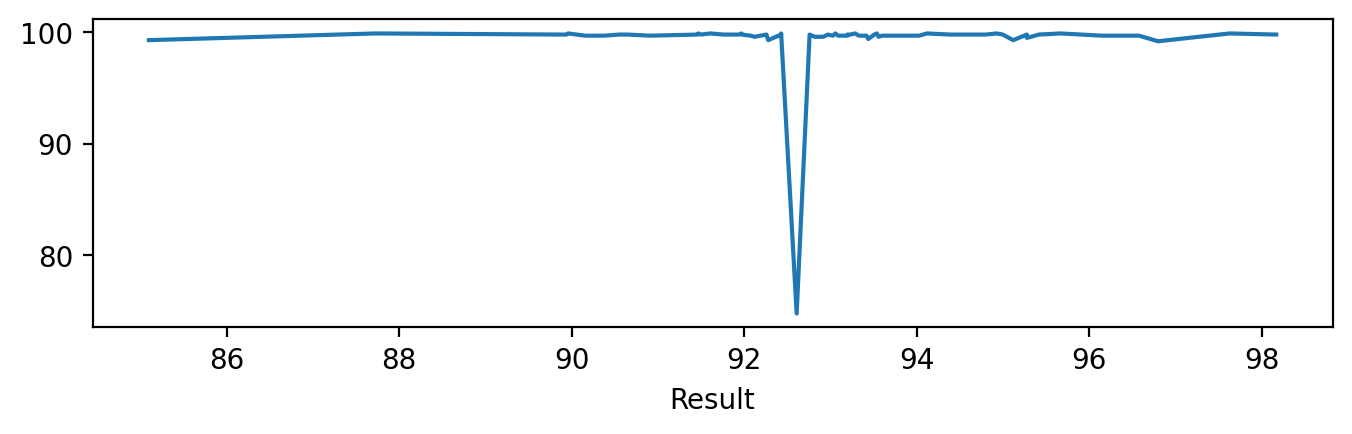

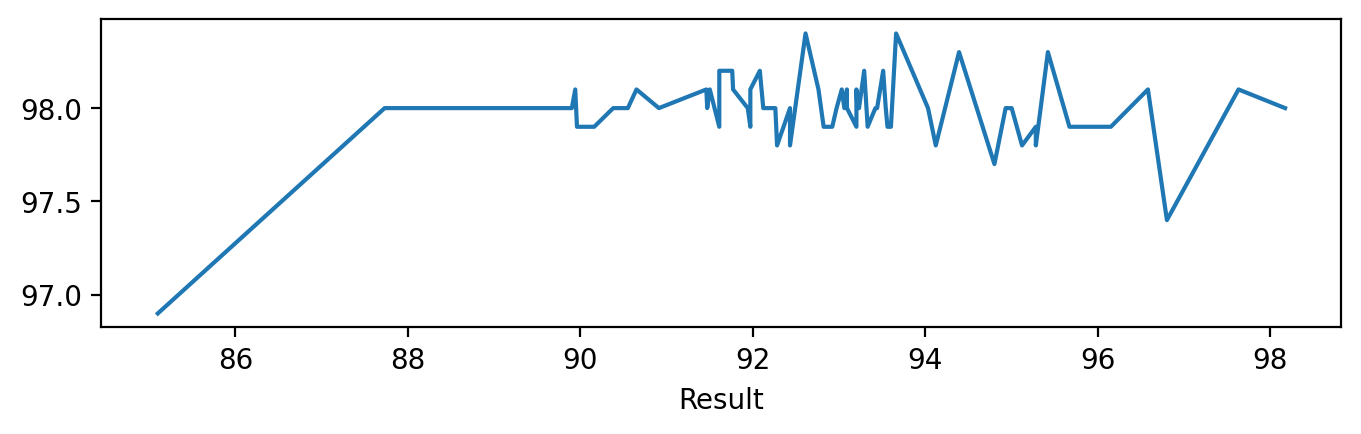

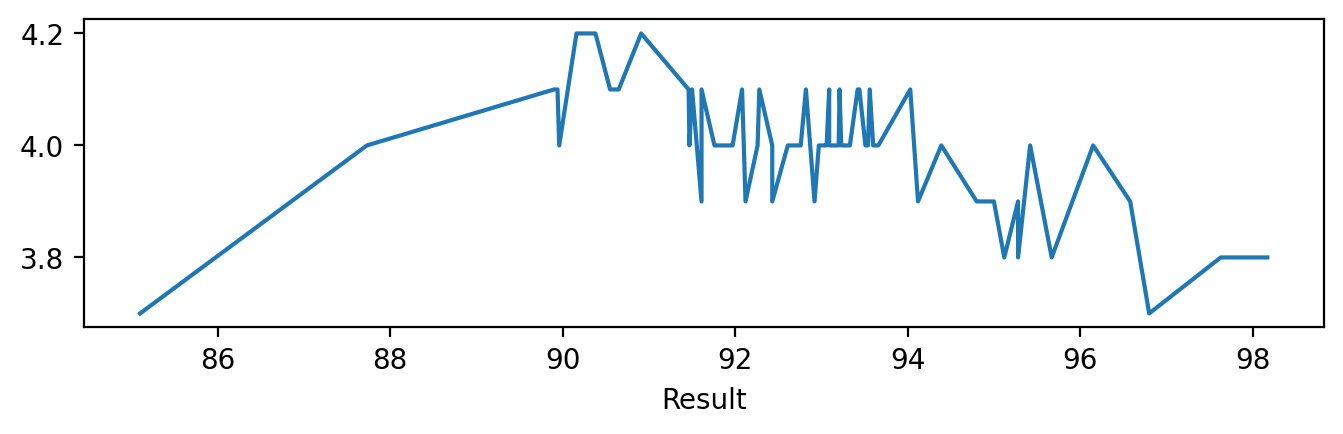

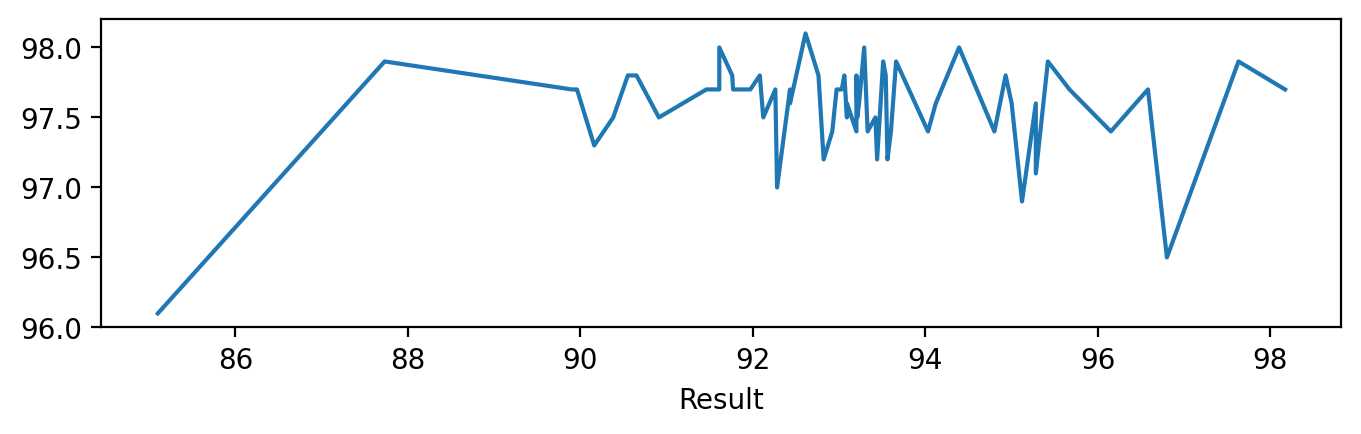

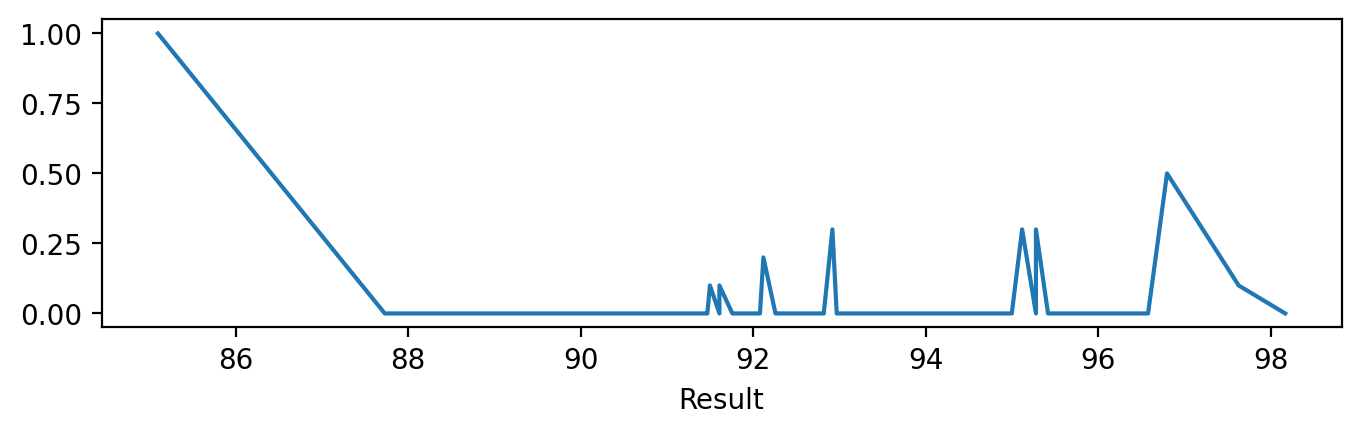

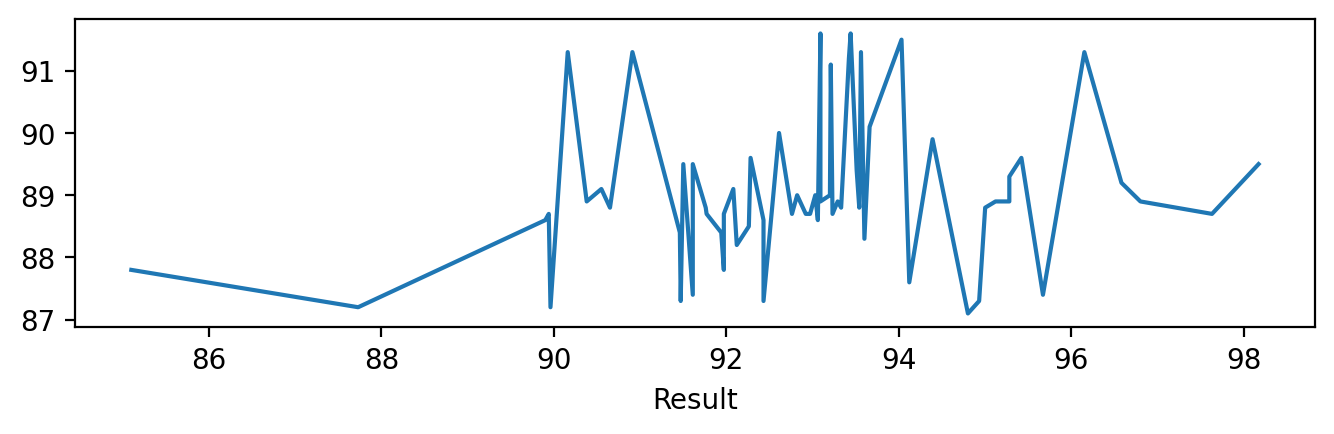

In [67]:
# 시각화
import matplotlib.pyplot as plt

# 레티나 디스플레이를 사용하는 경우 고화질로 출력해준다
%config InlineBackend.figure_format = 'retina'

ipc_df_trn_sort = ipc_df_trn.copy()
ipc_df_trn_sort.set_index("Result",inplace=True)

ipc_df_trn_sort.sort_index(ascending=True,inplace=True)

ipc_df_trn_sort

for f in features:
    plt.figure(figsize=(8, 2))
    ipc_df_trn_sort[f].plot()
    plt.show()